In [1]:
import random as random
from typing import Union

import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from dataset_scripts import train_valid_test_splits_v1
from sklearn.model_selection import train_test_split

from src.dataset import get_normalizing_scaler, df_to_patient_tensors
from src.constants import CATEGORICAL_CONFOUNDERS, CONTINUOUS_COVARIATES_PROCESSED, STATIC_COLS, TARGET_COL


/home/gaurang/anaconda3/envs/gnn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fpath_base_data = "/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/20220907_002221_base_dataset.csv"

In [62]:
df_base_data = pd.read_csv(fpath_base_data)
df_base_data

,subject_id,stay_id,hr,glucose,sofa_24hours,liver_24hours,weight_kg,height_cm,bmi,cns_24hours,...,malignant_cancer,aids,diabetes,diabetes_type,septic,gender,ethnicity,tube_feeding,dextrose,insulin
0,12207593,30000646,0.0,102.0,0.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,0.000000,0.000000
1,12207593,30000646,4.0,108.0,1.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,2.500000,0.000000
2,12207593,30000646,17.0,144.0,3.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,2.500000,0.000000
3,12207593,30000646,27.0,86.0,3.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,0.000000,0.000000
4,12207593,30000646,55.0,119.0,1.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,2.916667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211899,11256534,39999552,13.0,86.0,8.0,0.0,64.500000,172.72,21.6,4.0,...,0,0,0,0,0,F,WHITE,0.0,0.918011,1.305320
211900,11256534,39999552,14.0,91.0,8.0,0.0,64.500000,172.72,21.6,4.0,...,0,0,0,0,0,F,WHITE,0.0,0.969222,1.138684
211901,11256534,39999552,16.0,134.0,8.0,0.0,64.500000,172.72,21.6,4.0,...,0,0,0,0,0,F,WHITE,0.0,0.713331,0.499910
211902,11256534,39999552,17.0,92.0,8.0,0.0,64.500000,172.72,21.6,4.0,...,0,0,0,0,0,F,WHITE,0.0,0.747886,0.422146


In [63]:
df_base_data = df_base_data[(df_base_data.glucose > 50) & (df_base_data.glucose < 400)]

In [64]:
len(df_base_data)

210793

<AxesSubplot:>

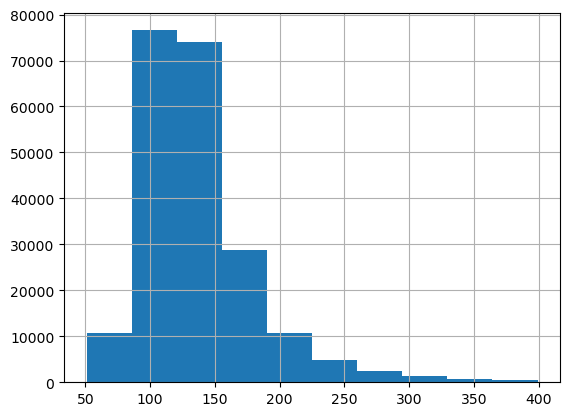

In [58]:
df_base_data[(df_base_data.glucose > 50) & (df_base_data.glucose < 400)].glucose.hist()

<AxesSubplot:>

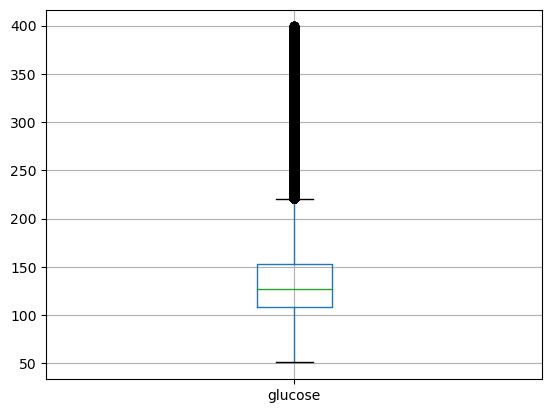

In [59]:
df_base_data[(df_base_data.glucose > 50) & (df_base_data.glucose < 400)].boxplot(column='glucose')

In [65]:
df_train, df_valid, df_test = train_valid_test_splits_v1(df_base_data, seed=345)

<AxesSubplot:>

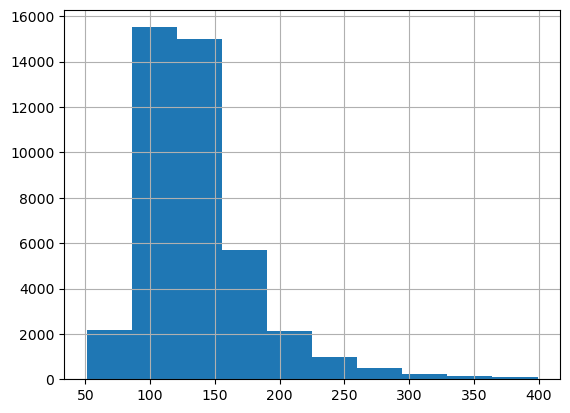

In [69]:
df_test.glucose.hist()

In [70]:
df_train.to_csv("/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/train_test_splits/v3_patient_split/train.csv")
df_valid.to_csv("/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/train_test_splits/v3_patient_split/valid.csv")
df_test.to_csv("/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/train_test_splits/v3_patient_split/test.csv")

In [5]:
feature_cols = CONTINUOUS_COVARIATES_PROCESSED+STATIC_COLS+TARGET_COL
scaler = get_normalizing_scaler(df_train[feature_cols])

In [9]:
f, t = df_to_patient_tensors(df_train, feature_cols, TARGET_COL, scaler)

In [16]:
f[1].shape

torch.Size([20, 16])

In [29]:
a = scaler.transform(df_train[CONTINUOUS_COVARIATES_PROCESSED+STATIC_COLS])

In [33]:
type(scaler)

sklearn.preprocessing._data.StandardScaler

In [34]:
df_patient_group = df_base_data.groupby(by='subject_id')

In [40]:
for a in df_patient_group:
    print(a[1].head())
    break

        subject_id   stay_id    hr  glucose  sofa_24hours  liver_24hours  \
158594    10001884  37510196   2.0    148.0           3.0            0.0   
158595    10001884  37510196  23.0    145.0           4.0            0.0   
158596    10001884  37510196  48.0    199.0           4.0            0.0   
158597    10001884  37510196  52.0    177.0           4.0            0.0   
158598    10001884  37510196  54.0    175.0           4.0            0.0   

        weight_kg  height_cm   bmi  cns_24hours  ...  malignant_cancer  aids  \
158594       65.0     157.48  26.2          0.0  ...                 0     0   
158595       65.0     157.48  26.2          0.0  ...                 0     0   
158596       65.0     157.48  26.2          0.0  ...                 0     0   
158597       65.0     157.48  26.2          0.0  ...                 0     0   
158598       65.0     157.48  26.2          0.0  ...                 0     0   

        diabetes  diabetes_type  septic  gender               

In [6]:
sample_df = df_patient_group.get_group(random.choice(subject_ids)).drop(labels=CATEGORICAL_CONFOUNDERS, axis=1)

In [7]:
sample_df

,subject_id,stay_id,hr,glucose,sofa_24hours,liver_24hours,weight_kg,height_cm,bmi,cns_24hours,admission_age,cardiovascular_24hours,charlson_comorbidity_index,coagulation_24hours,respiration_24hours,renal_24hours,admission_age.1,tube_feeding,dextrose,insulin
161028,11482212,37616420,0.0,99.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.000000,0.000000
161029,11482212,37616420,2.0,102.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.000000,0.000000
161030,11482212,37616420,3.0,124.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.006944,0.000000
161031,11482212,37616420,4.0,141.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.090278,0.138889
161032,11482212,37616420,6.0,129.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.256944,1.430706
161033,11482212,37616420,7.0,135.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.340278,1.764096
161034,11482212,37616420,8.0,130.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.416667,2.161420
161035,11482212,37616420,10.0,141.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.416667,2.222818
161036,11482212,37616420,11.0,129.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.833333,2.231245
161037,11482212,37616420,12.0,117.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.833333,2.398032


### plotting

In [8]:
from src.plotting_scripts import visualize_patient_data

(<Figure size 1080x720 with 2 Axes>,
 {'liver_24hours': 0.0,
  'cns_24hours': 0.0,
  'charlson_comorbidity_index': 4,
  'renal_24hours': 0.0,
  'tube_feeding': 0.0,
  'weight_kg': 90.0,
  'height_cm': 175.0,
  'bmi': 29.4,
  'admission_age': 76})

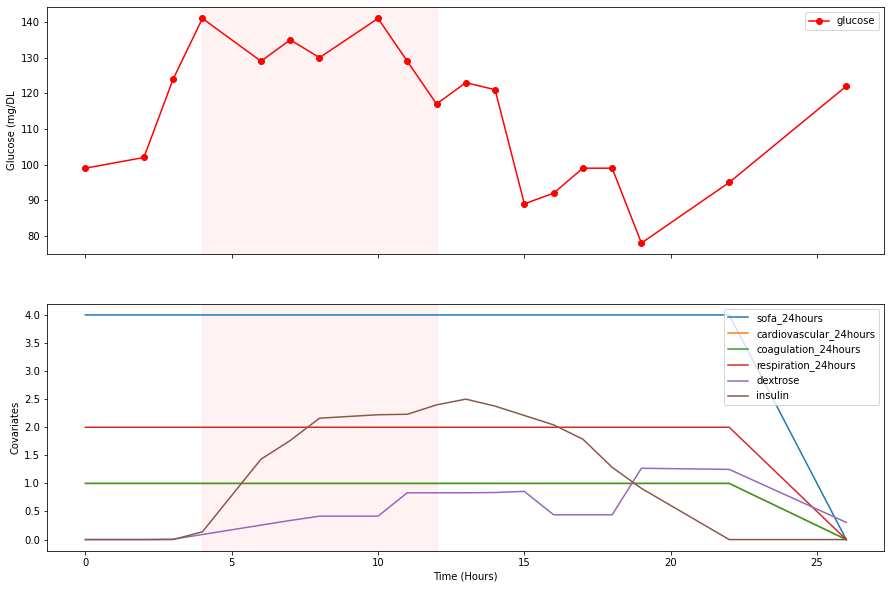

In [9]:
from src.constants import META_COLS


visualize_patient_data(sample_df, CONTINUOUS_COVARIATES_PROCESSED + STATIC_COLS, shade_hyperglycemia=True)

### create mini data splits

In [71]:
fpath_train = "/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/train_test_splits/v3_patient_split/train.csv"
fpath_valid = "/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/train_test_splits/v3_patient_split/valid.csv"
fpath_test = "/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/train_test_splits/v3_patient_split/test.csv"

df_train = pd.read_csv(fpath_train)
df_valid = pd.read_csv(fpath_valid)
df_test = pd.read_csv(fpath_test)


In [72]:
train_patient_mini = random.choices(df_train.subject_id.unique(), k=5)
valid_patient_mini = random.choices(df_valid.subject_id.unique(), k=5)
test_patient_mini = random.choices(df_test.subject_id.unique(), k=5)

In [73]:
df_train_mini = df_train[df_train.subject_id.isin(train_patient_mini)]
df_valid_mini = df_valid[df_valid.subject_id.isin(valid_patient_mini)]
df_test_mini = df_test[df_test.subject_id.isin(test_patient_mini)]

In [20]:
df_train_mini.to_csv("/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/train_test_splits/v3_patient_split_mini/train_mini.csv", index=None)
df_valid_mini.to_csv("/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/train_test_splits/v3_patient_split_mini/valid_mini.csv", index=None)
df_test_mini.to_csv("/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/train_test_splits/v3_patient_split_mini/test_mini.csv", index=None)


In [19]:
df_valid_mini

,Unnamed: 0,subject_id,stay_id,hr,glucose,sofa_24hours,liver_24hours,weight_kg,height_cm,bmi,...,malignant_cancer,aids,diabetes,diabetes_type,septic,gender,ethnicity,tube_feeding,dextrose,insulin
6409,31969,18566770,31555953,0.0,158.0,4.0,0.0,81.8,168.00,29.0,...,0,0,0,0,0,M,WHITE,0.0,0.000000,0.000000
6410,31970,18566770,31555953,1.0,125.0,4.0,0.0,81.8,168.00,29.0,...,0,0,0,0,0,M,WHITE,0.0,0.000000,0.027778
6411,31971,18566770,31555953,3.0,154.0,4.0,0.0,81.8,168.00,29.0,...,0,0,0,0,0,M,WHITE,0.0,0.000000,2.185746
6412,31972,18566770,31555953,4.0,163.0,4.0,0.0,81.8,168.00,29.0,...,0,0,0,0,0,M,WHITE,0.0,0.017077,3.657972
6413,31973,18566770,31555953,6.0,154.0,4.0,0.0,81.8,168.00,29.0,...,0,0,0,0,0,M,WHITE,0.0,0.567736,6.909140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36198,182632,18935648,38627895,14.0,96.0,4.0,0.0,96.4,182.88,28.8,...,0,0,0,0,0,M,WHITE,0.0,1.204212,1.541659
36199,182633,18935648,38627895,15.0,109.0,4.0,0.0,96.4,182.88,28.8,...,0,0,0,0,0,M,WHITE,0.0,2.093823,0.708330
36200,182634,18935648,38627895,17.0,138.0,4.0,0.0,96.4,182.88,28.8,...,0,0,0,0,0,M,WHITE,0.0,2.206380,0.000000
36201,182635,18935648,38627895,21.0,123.0,4.0,0.0,96.4,182.88,28.8,...,0,0,0,0,0,M,WHITE,0.0,2.827085,0.000000
